# Product Selection for Promotions #

Goal: analyse videogames sales data. Determine the most influential characteristics. Result of this study can we used for product selection for promotions. 

## Data Review

Upload the data and the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from pydoc import help
from scipy.stats.stats import pearsonr
from scipy import stats as st

In [2]:
data = pd.read_csv('/datasets/games.csv')

In [3]:
print("-------------------")
print('Data review')
display(data.head())
print("-----")
print('Summary')
print(data.info())
print("-----")
print('Missing values amount')
print(data.isnull().sum())
print("-----")
print('Statistics')
display(data.describe())
print("-----")
print('Duplicated rows')
print(data.duplicated().sum())    

-------------------
Data review


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


-----
Summary
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
-----
Missing values amount
Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Cr

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


-----
Duplicated rows
0


__Summary__

Feutures Year_of_Release and User_Score have incorrect data type (float and object). Features Year_of_Release, Critic_Score, User_Score and Rating missing values are observed. There are no negative values in the dataset. There are no duplicated rows neither. 

## Data Preparation

In [4]:
data.columns = data.columns.str.lower()

Find 'tbd' values

In [5]:
data.isin(['tbd']).sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score         2424
rating                0
dtype: int64

'tbd' values are found in feature 'user_score'. Check some of these objects.          

In [6]:
user_score_tbd = data[data['user_score'] == 'tbd']

In [7]:
user_score_tbd

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [8]:
user_score_tbd.describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2424.000000,2424.000000,2424.000000,2424.000000,1082.000000
mean,2007.450337,0.126052,0.043519,0.002727,0.015862,60.711645
std,3.484229,0.180586,0.111412,0.026136,0.039156,11.193035
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.075000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


'User_score' with 'tbd' has year_of_release between 1997 and 2016. Sales of these products in Europe, Japan, and other regions are quite low. 

Convert 'user_score' datatype to numeric

In [9]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')

In [10]:
data.isnull().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

Amount of missing values in user_score increased. 'tbd' values turned into missing values.                 

###### Missing values processing

Feature year_of_release has insignificant amount of missing values. Remove these objects.

In [11]:
data.shape

(16715, 11)

In [12]:
data.dropna(axis=0, subset=['year_of_release'], inplace=True)
data =data.reset_index(drop=True)

In [13]:
data.shape

(16446, 11)

Convert 'year_of_release' datatype from float to integer

In [14]:
data['year_of_release'] = data['year_of_release'].astype(int)

A part of missing values in critic_score and user_score can be filled in using median values, grouped by name and year_of_release

In [15]:
data['critic_score'] = data['critic_score'].fillna(data.groupby(['name', 'year_of_release'])['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby(['name', 'year_of_release'])['user_score'].transform('median'))

In [16]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7764
user_score         8189
rating             6678
dtype: int64

A part of missing values in critic_score and user_score can be filled in using median values, grouped by name of the product.

In [17]:
data['critic_score'] = data['critic_score'].fillna(data.groupby('name')['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby('name')['user_score'].transform('median'))

In [18]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       7524
user_score         7922
rating             6678
dtype: int64

Some of missing values in critic_score and user_score can be filled in using median values, grouped by genre, platform and year_of_release of the product.

In [19]:
data['critic_score'] = data['critic_score'].fillna(data.groupby(['genre', 'platform', 'year_of_release'])['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby(['genre', 'platform', 'year_of_release'])['user_score'].transform('median'))

In [20]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       1446
user_score         1519
rating             6678
dtype: int64

Some of missing values in critic_score and user_score can be filled in using median values, grouped by genre and platform of the product.

In [21]:
data['critic_score'] = data['critic_score'].fillna(data.groupby(['genre', 'platform'])['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby(['genre', 'platform'])['user_score'].transform('median'))

In [22]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score        381
user_score          410
rating             6678
dtype: int64

The rest of the missing values are filled in with median values grouped by genre.

In [23]:
data['critic_score'] = data['critic_score'].fillna(data.groupby('genre')['critic_score'].transform('median'))
data['user_score'] = data['user_score'].fillna(data.groupby('genre')['user_score'].transform('median'))

In [24]:
data.isnull().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          2
user_score            2
rating             6678
dtype: int64

<div class="alert alert-info"> <b>Комментарий студента v2:</b>

Заменим пропущенные значения в rating на unknown

Missing values in 'rating' are repleced with "unknown".

In [25]:
data['rating'][(data['rating'].isnull() == True)] = "unknown"

In [26]:
data.isnull().sum()

name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       2
user_score         2
rating             0
dtype: int64

In [27]:
missing_data = data[data['name'].isnull() == True]

In [28]:
missing_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
652,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,unknown
14022,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,unknown


There are only two rows with missing values. Not a lot of information is provided for these objects, rows should be deleted.

In [29]:
data = data.dropna()

In [30]:
data.isnull().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

In [31]:
data['total_sales'] = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis = 1)

In [32]:
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.00,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,70.0,7.80,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.30,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.00,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,74.0,7.90,unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,63.5,6.40,unknown,0.01
16442,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,76.5,6.75,unknown,0.01
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,78.0,7.80,unknown,0.01
16444,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,66.5,7.80,unknown,0.01


__Summary__

Data was analysed and prepared for further analysis

## Exploratory Data Analysis

Group data by year_of_release and calculate the amount of video games being released every year.

In [33]:
games_by_year_amount = data.groupby(['year_of_release'])['year_of_release'].sum()

In [34]:
games_by_year_amount.head()

year_of_release
1980    17820
1981    91126
1982    71352
1983    33711
1984    27776
Name: year_of_release, dtype: int32

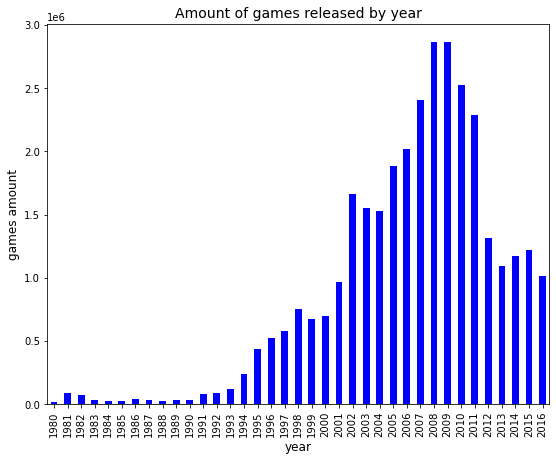

In [35]:
plt.figure(figsize=(9, 7))
ax = games_by_year_amount.astype(int).plot.bar(color='blue');
plt.title('Amount of games released by year',fontsize=14)
plt.xlabel('year',fontsize=12)
plt.ylabel('games amount',fontsize=12);
plt.show()

Significant increase in amount of videogames being released is observed after 1990. There is also a peak around 2008-2009. Distribution is left skewed. 

Group data by platform type and calculate the total amount of videogames released for each of the platforms.

In [36]:
games_by_platform_profit = data.groupby(['platform'])['total_sales'].sum()
games_by_platform_profit = games_by_platform_profit.sort_values(ascending=False)

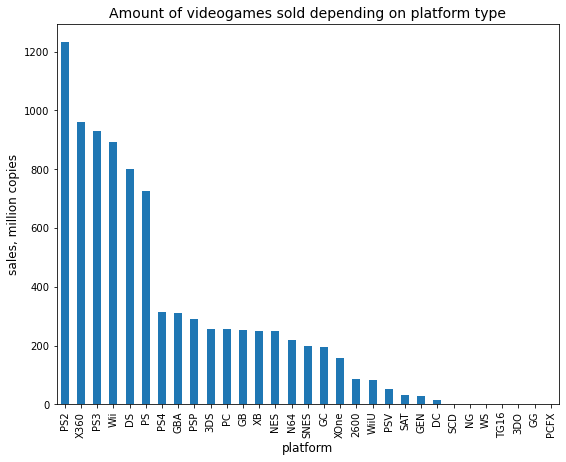

In [37]:
plt.figure(figsize=(9, 7))
ax = games_by_platform_profit.astype(int).plot.bar();
plt.title('Amount of videogames sold depending on platform type',fontsize=14)
plt.xlabel('platform',fontsize=12)
plt.ylabel('sales, million copies',fontsize=12);

Sales amount depends on platform type. Find the most profitable platforms.

In [38]:
sales_by_platform_top_ten = games_by_platform_profit.head(6)
sales_by_platform_top_ten = sales_by_platform_top_ten.to_frame()
sales_by_platform_top_ten = sales_by_platform_top_ten.reset_index(level='platform')
sales_by_platform_top_ten

,platform,total_sales
0,PS2,1233.56
1,X360,961.24
2,PS3,931.34
3,Wii,891.18
4,DS,802.78
5,PS,727.58


In [39]:
sales_by_platform_top_ten_table = data.groupby(['platform', 'year_of_release'])['total_sales'].sum()

In [40]:
sales_by_platform_top_ten_table = sales_by_platform_top_ten_table.to_frame()
sales_by_platform_top_ten_table

total_sales
platform year_of_release             
2600     1980                   11.38
         1981                   35.68
         1982                   28.88
         1983                    5.84
         1984                    0.27
...                               ...
XB       2008                    0.18
XOne     2013                   18.96
         2014                   54.07
         2015                   60.14
         2016                   26.15

[238 rows x 1 columns]

Drop index for 'platform' and 'year_of_release'

In [41]:
sales_by_platform_top_ten_table = sales_by_platform_top_ten_table.reset_index(level=['platform', 'year_of_release'])

In [42]:
sales_by_platform_top_ten_table

,platform,year_of_release,total_sales
0,2600,1980,11.38
1,2600,1981,35.68
2,2600,1982,28.88
3,2600,1983,5.84
4,2600,1984,0.27
...,...,...,...
233,XB,2008,0.18
234,XOne,2013,18.96
235,XOne,2014,54.07
236,XOne,2015,60.14


In [43]:
sales_by_platform_top_ten_table_new = pd.merge(sales_by_platform_top_ten_table, sales_by_platform_top_ten, on='platform', how='right')

In [44]:
sales_by_platform_top_ten_table_new

,platform,year_of_release,total_sales_x,total_sales_y
0,PS2,2000,39.17,1233.56
1,PS2,2001,166.43,1233.56
2,PS2,2002,205.38,1233.56
3,PS2,2003,184.31,1233.56
4,PS2,2004,211.81,1233.56
...,...,...,...,...
62,PS,1999,144.53,727.58
63,PS,2000,96.37,727.58
64,PS,2001,35.59,727.58
65,PS,2002,6.67,727.58


In [45]:
data_ps2 = sales_by_platform_top_ten_table_new.query('platform == "PS2"')
data_x360 = sales_by_platform_top_ten_table_new.query('platform == "X360"')
data_ps3 = sales_by_platform_top_ten_table_new.query('platform == "PS3"')
data_wii = sales_by_platform_top_ten_table_new.query('platform == "Wii"')
data_ds = sales_by_platform_top_ten_table_new.query('platform == "DS"')
data_ps = sales_by_platform_top_ten_table_new.query('platform == "PS"')

In [46]:
data_ps2 = data_ps2.drop(['platform', 'total_sales_y'], axis=1)

In [47]:
data_ps2 = data_ps2.set_index('year_of_release')

In [48]:
data_x360 = data_x360.drop(['platform', 'total_sales_y'], axis=1)
data_x360 = data_x360.set_index('year_of_release')
data_ps3 = data_ps3.drop(['platform', 'total_sales_y'], axis=1)
data_ps3 = data_ps3.set_index('year_of_release')
data_wii = data_wii.drop(['platform', 'total_sales_y'], axis=1)
data_wii = data_wii.set_index('year_of_release')
data_ds = data_ds.drop(['platform', 'total_sales_y'], axis=1)
data_ds = data_ds.set_index('year_of_release')
data_ps = data_ps.drop(['platform', 'total_sales_y'], axis=1)
data_ps = data_ps.set_index('year_of_release')

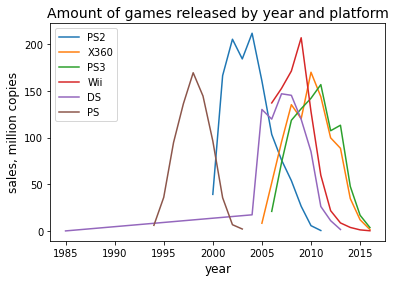

In [49]:
fig = plt.figure()

ax = fig.add_subplot(1,1,1)

ax.plot(data_ps2, label="PS2")
ax.plot(data_x360, label="X360")
ax.plot(data_ps3, label="PS3")
ax.plot(data_wii, label="Wii")
ax.plot(data_ds, label="DS")
ax.plot(data_ps, label="PS")

plt.legend(loc='best')
plt.title('Amount of games released by year and platform',fontsize=14)
plt.xlabel('year',fontsize=12)
plt.ylabel('sales, million copies',fontsize=12);
plt.show()

On avarage the 'life' of a videogame is around 10 years. 

###### Analyse profitability of prodicts for 2017 year using data for preceding years (2014-2016)

In [50]:
data_2016 = data[(data['year_of_release'] == 2016) | (data['year_of_release'] == 2015) | (data['year_of_release'] == 2014)]

In [51]:
data_2016

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,6.60,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.30,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,75.5,7.95,unknown,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,6.60,unknown,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16434,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,78.0,7.80,unknown,0.01
16438,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,81.0,8.55,unknown,0.01
16441,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,63.5,6.40,unknown,0.01
16443,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,78.0,7.80,unknown,0.01


Group data by platform to calculate total sales

In [52]:
data_2016_platforms = data_2016.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
data_2016_platforms = data_2016_platforms.to_frame()
data_2016_platforms = data_2016_platforms.reset_index(level='platform')
data_2016_platforms

,platform,total_sales
0,PS4,288.15
1,XOne,140.36
2,3DS,86.68
3,PS3,68.18
4,X360,48.22
5,WiiU,42.98
6,PC,27.05
7,PSV,22.40
8,Wii,5.07
9,PSP,0.36


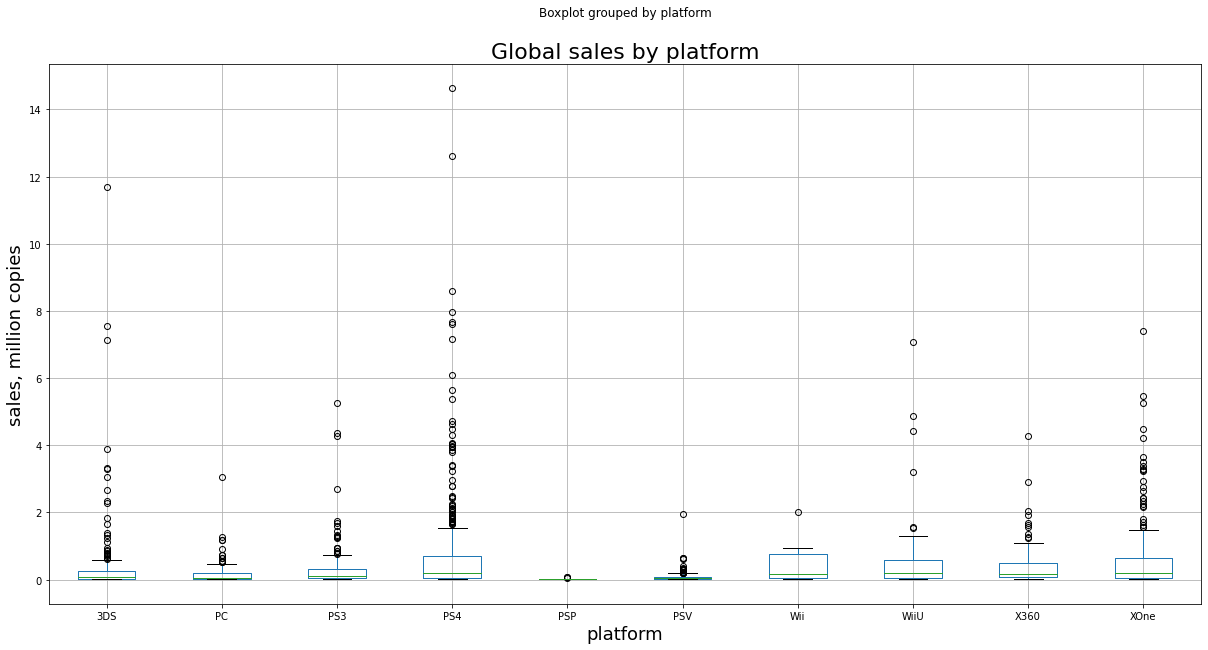

In [53]:
data_2016.boxplot('total_sales', by='platform', figsize=(20, 10));
plt.title('Global sales by platform',fontsize=22)
plt.xlabel('platform',fontsize=18)
plt.ylabel('sales, million copies',fontsize=18);

Make boxplot with data grouped by year.

In [54]:
data_2016_grouped_by_year = data_2016.groupby(['platform', 'year_of_release'])['total_sales'].sum()
data_2016_grouped_by_year = data_2016_grouped_by_year.to_frame()

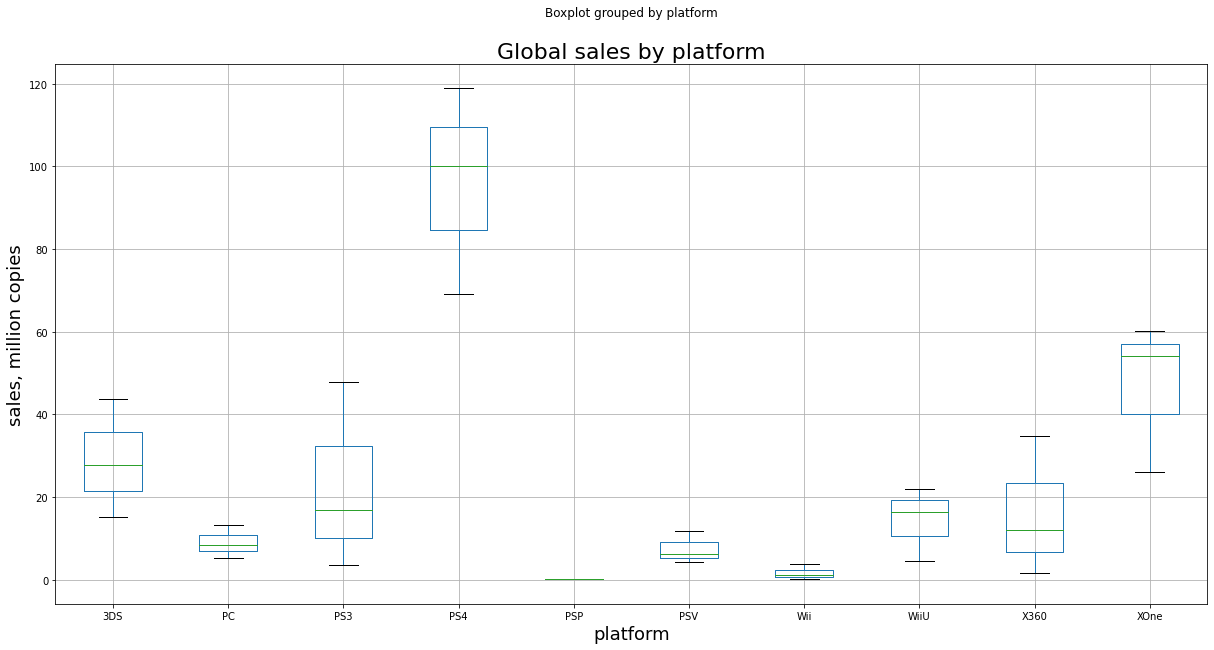

In [55]:
data_2016_grouped_by_year.boxplot('total_sales', by='platform', figsize=(20, 10));
plt.title('Global sales by platform',fontsize=22)
plt.xlabel('platform',fontsize=18)
plt.ylabel('sales, million copies',fontsize=18);

For the period of 2014-2016 the top selling platforms are PS4, XOne, 3DS, PS3, WiiU, X360. PS4 platform shows the largest amount of sales. To study the influence of reviews on sales, analize data for PS4.

In [56]:
data_ps4 = data_2016.query('platform == "PS4"')

In [57]:
data_ps4

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,73.0,6.60,unknown,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.30,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.30,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,73.0,6.60,unknown,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.70,M,7.66
...,...,...,...,...,...,...,...,...,...,...,...,...
16232,Root Letter,PS4,2016,Adventure,0.00,0.00,0.01,0.00,69.0,7.50,unknown,0.01
16235,Shin Hayarigami 2,PS4,2016,Adventure,0.00,0.00,0.01,0.00,72.0,7.65,unknown,0.01
16257,Dungeons 2,PS4,2016,Role-Playing,0.01,0.00,0.00,0.00,61.0,7.90,T,0.01
16261,Carmageddon: Max Damage,PS4,2016,Action,0.01,0.00,0.00,0.00,51.0,5.50,M,0.01


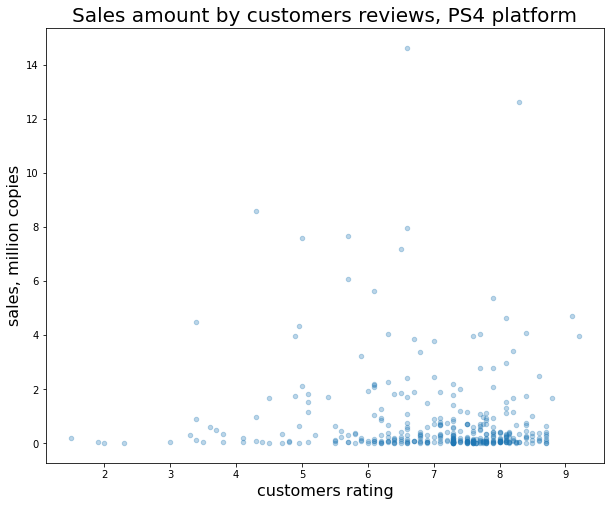

In [58]:
data_ps4.plot.scatter(x='user_score', y='total_sales', alpha=0.3, figsize=(10, 8));
plt.title('Sales amount by customers reviews, PS4 platform',fontsize=20)
plt.xlabel('customers rating',fontsize=16)
plt.ylabel('sales, million copies',fontsize=16);

Calculate Pearson coefficient and p-value

In [59]:
pearsonr(data_ps4['user_score'], data_ps4['total_sales'])

(-0.08406361930472753, 0.10362913411097115)

Pearson coefficient is close to zero, p-value is higher than 0.05. Test is statistically insignificant. No conclusion can be made about dependance of sales amount on customers reviews for given period of time (2014-2016).

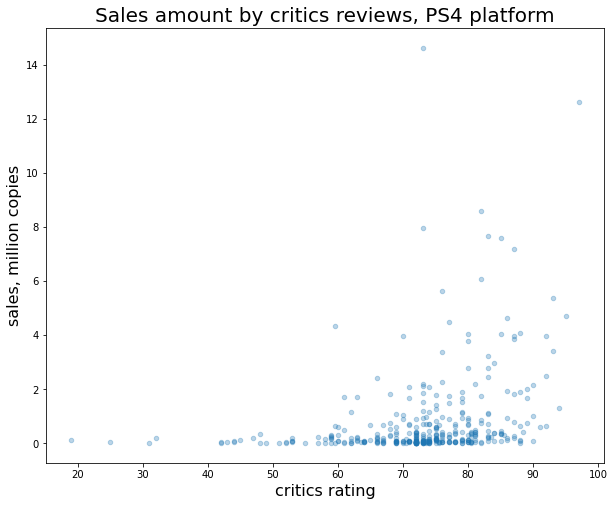

In [60]:
data_ps4.plot.scatter(x='critic_score', y='total_sales', alpha=0.3, figsize=(10, 8));
plt.title('Sales amount by critics reviews, PS4 platform',fontsize=20)
plt.xlabel('critics rating',fontsize=16)
plt.ylabel('sales, million copies',fontsize=16);

Calculate Pearson coefficient and p-value

In [61]:
pearsonr(data_ps4['critic_score'], data_ps4['total_sales'])

(0.2942588517529424, 6.021471204172985e-09)

Pearson coefficient is about 0.3. It indicates linear correlation between amount of sales and critics reviews.

Compare results for PS4 to other platforms for the same period (2014-2016)

In [62]:
data_other_platforms = data_2016.query('platform != "PS4"')

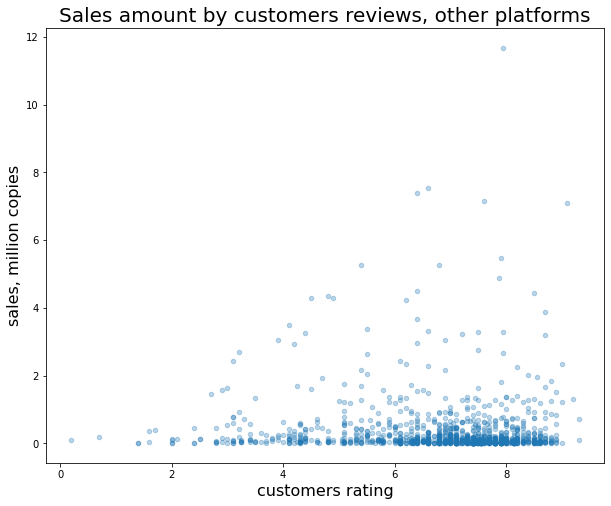

In [63]:
data_other_platforms.plot.scatter(x='user_score', y='total_sales', alpha=0.3, figsize=(10, 8));
plt.title('Sales amount by customers reviews, other platforms',fontsize=20)
plt.xlabel('customers rating',fontsize=16)
plt.ylabel('sales, million copies',fontsize=16);

Calculate Pearson coefficient and p-value

In [64]:
pearsonr(data_other_platforms['user_score'], data_other_platforms['total_sales'])

(-0.04767725851955419, 0.08417872146397937)

Pearson coefficient is close to zero, p-value is higher than 0.05. Test is statistically insignificant. No conclusion can be made about dependance of sales amount on customers reviews for given period of time (2014-2016) for other platforms.

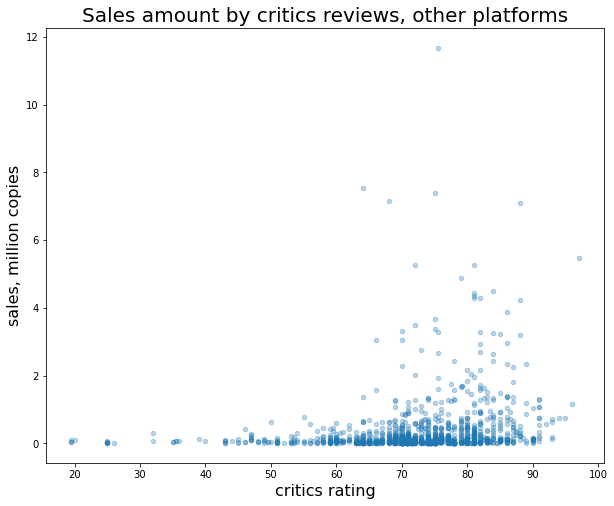

In [65]:
data_other_platforms.plot.scatter(x='critic_score', y='total_sales', alpha=0.3, figsize=(10, 8));
plt.title('Sales amount by critics reviews, other platforms',fontsize=20)
plt.xlabel('critics rating',fontsize=16)
plt.ylabel('sales, million copies',fontsize=16);

Calculate Pearson coefficient and p-value

In [66]:
pearsonr(data_other_platforms['critic_score'], data_other_platforms['total_sales'])

(0.19780230965900503, 4.753083413765443e-13)

Pearson coefficient is about 0.2. There is some linear correlation between amount of sales and critics reviews  for other platforms.

###### Check distribution by genre

Group data by genre and calculate sales amount.

In [67]:
sales_by_genre = data.groupby(['genre'])['total_sales'].sum()
sales_by_genre = sales_by_genre.sort_values(ascending=False)

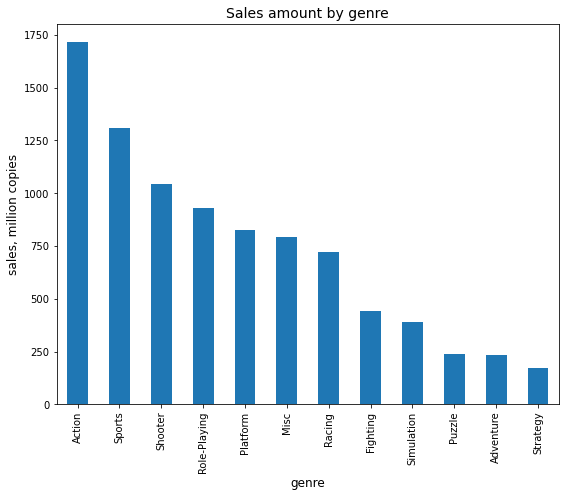

In [68]:
plt.figure(figsize=(9, 7))
ax = sales_by_genre.plot.bar();
plt.title('Sales amount by genre',fontsize=14)
plt.xlabel('genre',fontsize=12)
plt.ylabel('sales, million copies',fontsize=12);

Genres with the largest amount of sales are Action and Sports. Genres with the lowest sales are Strategy, Adventure and Puzzle.

To get more information, check mean and median by genre

In [69]:
sales_by_genre_2014_to_2016 = data_2016.groupby(['genre'])['total_sales'].agg(['mean', 'median'])

In [70]:
sales_by_genre_2014_to_2016.sort_values(by='mean', ascending=False)

,mean,median
genre,,
Shooter,1.335469,0.515
Sports,0.680000,0.180
Platform,0.476053,0.140
Fighting,0.470333,0.125
Role-Playing,0.459005,0.110
Racing,0.398841,0.090
Misc,0.332301,0.090
Action,0.322068,0.090
Simulation,0.298409,0.100


Genre Shooter shows highest mean and median sales.

## Consumer profile analysis by region

###### Analyse platforms popylarity by regions

In [71]:
platforms_by_regions = data_2016.groupby('platform')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()

In [72]:
platforms_by_regions = platforms_by_regions.reset_index(level='platform')

_Analyse platforms popylarity by regions - North America_

In [73]:
platforms_by_regions_na = platforms_by_regions.drop(['eu_sales', 'jp_sales', 'other_sales'], axis=1).sort_values(by='na_sales', ascending=False)
na_sales_other_top5 = platforms_by_regions_na.head()
na_sales_other_top5

,platform,na_sales
3,PS4,98.61
9,XOne,81.27
8,X360,28.30
0,3DS,22.64
2,PS3,22.05


In [74]:
platforms_by_regions_na['platform'][(platforms_by_regions_na['platform'] !='PS4') & (platforms_by_regions_na['platform'] !='XOne')& (platforms_by_regions_na['platform'] !='X360')& (platforms_by_regions_na['platform'] !='3DS')& (platforms_by_regions_na['platform'] !='PS3')] = "other"

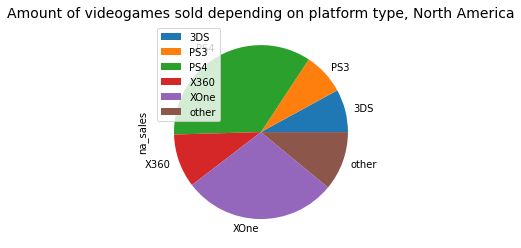

In [75]:
platforms_by_regions_na.groupby(['platform']).sum().plot(kind='pie', y='na_sales');
plt.title('Amount of videogames sold depending on platform type, North America',fontsize=14);

_Analyse platforms popylarity by regions - Europe_

In [76]:
platforms_by_regions_eu = platforms_by_regions.drop(['na_sales', 'jp_sales', 'other_sales'], axis=1).sort_values(by='eu_sales', ascending=False)
platforms_by_regions_eu_top5 = platforms_by_regions_eu.head()
platforms_by_regions_eu_top5

,platform,eu_sales
3,PS4,130.04
9,XOne,46.25
2,PS3,25.54
1,PC,17.97
0,3DS,16.12


In [77]:
platforms_by_regions_eu['platform'][(platforms_by_regions_eu['platform'] !='PS4') & (platforms_by_regions_eu['platform'] !='XOne')& (platforms_by_regions_eu['platform'] !='PS3')& (platforms_by_regions_eu['platform'] !='PC')& (platforms_by_regions_eu['platform'] !='3DS')] = "other"

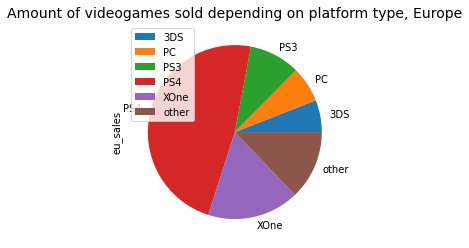

In [78]:
platforms_by_regions_eu.groupby(['platform']).sum().plot(kind='pie', y='eu_sales');
plt.title('Amount of videogames sold depending on platform type, Europe',fontsize=14);

_Analyse platforms popylarity by regions - Japan_

In [79]:
platforms_by_regions_jp = platforms_by_regions.drop(['na_sales', 'eu_sales', 'other_sales'], axis=1).sort_values(by='jp_sales', ascending=False)
platforms_by_regions_jp_top5 = platforms_by_regions_jp.head()
platforms_by_regions_jp_top5

,platform,jp_sales
0,3DS,44.24
3,PS4,15.02
5,PSV,14.54
2,PS3,11.22
7,WiiU,7.31


In [80]:
platforms_by_regions_jp['platform'][(platforms_by_regions_jp['platform'] !='3DS') & (platforms_by_regions_jp['platform'] !='PS4')& (platforms_by_regions_jp['platform'] !='PSV')& (platforms_by_regions_jp['platform'] !='PS3')& (platforms_by_regions_jp['platform'] !='WiiU')] = "other"

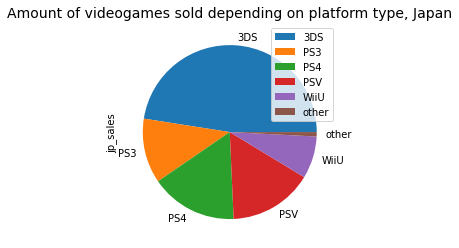

In [81]:
platforms_by_regions_jp.groupby(['platform']).sum().plot(kind='pie', y='jp_sales');
plt.title('Amount of videogames sold depending on platform type, Japan',fontsize=14);

_Analyse platforms popylarity by regions - Other regions_

In [82]:
platforms_by_regions_other = platforms_by_regions.drop(['na_sales', 'eu_sales', 'jp_sales'], axis=1).sort_values(by='other_sales', ascending=False)
platforms_by_regions_other_top5 = platforms_by_regions_other.head()
platforms_by_regions_other_top5

,platform,other_sales
3,PS4,44.48
9,XOne,12.52
2,PS3,9.37
8,X360,4.35
0,3DS,3.68


In [83]:
platforms_by_regions_other['platform'][(platforms_by_regions_other['platform'] !='PS4') & (platforms_by_regions_other['platform'] !='XOne')& (platforms_by_regions_other['platform'] !='PS3')& (platforms_by_regions_other['platform'] !='X360')& (platforms_by_regions_other['platform'] !='3DS')] = "other"

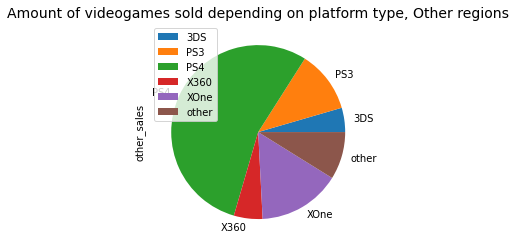

In [84]:
platforms_by_regions_other.groupby(['platform']).sum().plot(kind='pie', y='other_sales');
plt.title('Amount of videogames sold depending on platform type, Other regions',fontsize=14);

Platforms with the largest amount of sales are quite silimar for all regions analysed. XOne was not very popular in Japan compared to other regions. WiiU platform was popular mostly in Japan. 

###### Analyse genre popylarity by regions

In [85]:
jenres_by_regions = data_2016.groupby('genre')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()

_Analyse genre popylarity by regions - North America_

In [86]:
jenres_by_regions_na = jenres_by_regions.drop(['eu_sales', 'jp_sales', 'other_sales'], axis=1).sort_values(by='na_sales', ascending=False)
jenres_by_regions_na = jenres_by_regions_na.reset_index(level='genre')
jenres_by_regions_na_top5 = jenres_by_regions_na.head()
jenres_by_regions_na_top5

,genre,na_sales
0,Shooter,79.02
1,Action,72.53
2,Sports,46.13
3,Role-Playing,33.47
4,Misc,15.05


In [87]:
jenres_by_regions_na['genre'][(jenres_by_regions_na['genre'] !='Shooter') & (jenres_by_regions_na['genre'] !='Action')& (jenres_by_regions_na['genre'] !='Sports')& (jenres_by_regions_na['genre'] !='Role-Playing')& (jenres_by_regions_na['genre'] !='Misc')] = "other"

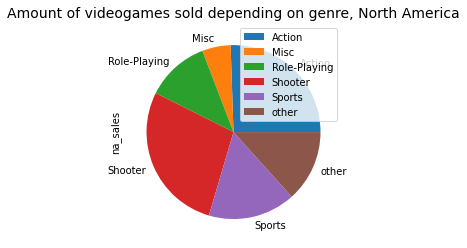

In [88]:
jenres_by_regions_na.groupby(['genre']).sum().plot(kind='pie', y='na_sales');
plt.title('Amount of videogames sold depending on genre, North America',fontsize=14);

_Analyse genre popylarity by regions - Europe_

In [89]:
jenres_by_regions_eu = jenres_by_regions.drop(['na_sales', 'jp_sales', 'other_sales'], axis=1).sort_values(by='eu_sales', ascending=False)
jenres_by_regions_eu = jenres_by_regions_eu.reset_index(level='genre')
jenres_by_regions_eu_top5 = jenres_by_regions_eu.head()
jenres_by_regions_eu_top5

,genre,eu_sales
0,Action,74.68
1,Shooter,65.52
2,Sports,45.73
3,Role-Playing,28.17
4,Racing,14.13


In [90]:
jenres_by_regions_eu['genre'][(jenres_by_regions_eu['genre'] !='Action') & (jenres_by_regions_eu['genre'] !='Sports')& (jenres_by_regions_eu['genre'] !='Shooter')& (jenres_by_regions_eu['genre'] !='Racing')& (jenres_by_regions_eu['genre'] !='Role-Playing')] = "другие"

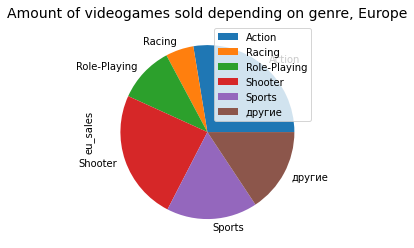

In [91]:
jenres_by_regions_eu.groupby(['genre']).sum().plot(kind='pie', y='eu_sales');
plt.title('Amount of videogames sold depending on genre, Europe',fontsize=14);

_Analyse genre popylarity by regions - Japan_

In [92]:
jenres_by_regions_jp = jenres_by_regions.drop(['na_sales', 'eu_sales', 'other_sales'], axis=1).sort_values(by='jp_sales', ascending=False)
jenres_by_regions_jp = jenres_by_regions_jp.reset_index(level='genre')
jenres_by_regions_jp_top5 = jenres_by_regions_jp.head()
jenres_by_regions_jp_top5

,genre,jp_sales
0,Role-Playing,31.16
1,Action,29.58
2,Fighting,6.37
3,Misc,5.61
4,Shooter,4.87


In [93]:
jenres_by_regions_jp['genre'][(jenres_by_regions_jp['genre'] !='Role-Playing') & (jenres_by_regions_jp['genre'] !='Action')& (jenres_by_regions_jp['genre'] !='Fighting')& (jenres_by_regions_jp['genre'] !='Misc')& (jenres_by_regions_jp['genre'] !='Shooter')] = "другие"

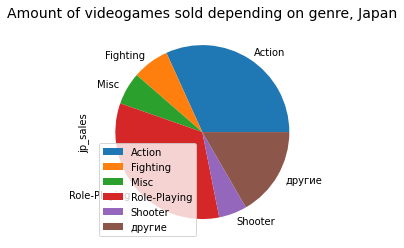

In [94]:
jenres_by_regions_jp.groupby(['genre']).sum().plot(kind='pie', y='jp_sales');
plt.title('Amount of videogames sold depending on genre, Japan',fontsize=14);

_Analyse genre popylarity by regions - Other regions_

In [95]:
jenres_by_regions_other = jenres_by_regions.drop(['na_sales', 'eu_sales', 'jp_sales'], axis=1).sort_values(by='other_sales', ascending=False)
jenres_by_regions_other = jenres_by_regions_other.reset_index(level='genre')
jenres_by_regions_other_top5 = jenres_by_regions_other.head()
jenres_by_regions_other_top5

,genre,other_sales
0,Action,22.57
1,Shooter,21.53
2,Sports,14.36
3,Role-Playing,8.64
4,Misc,4.03


In [96]:
jenres_by_regions_other['genre'][(jenres_by_regions_other['genre'] !='Action') & (jenres_by_regions_other['genre'] !='Sports')& (jenres_by_regions_other['genre'] !='Shooter')& (jenres_by_regions_other['genre'] !='Role-Playing')& (jenres_by_regions_other['genre'] !='Misc')] = "other"

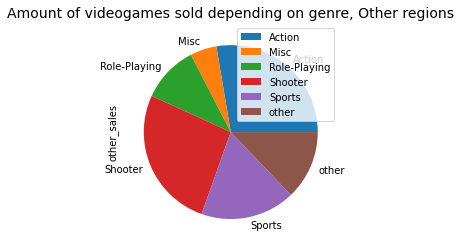

In [97]:
jenres_by_regions_other.groupby(['genre']).sum().plot(kind='pie', y='other_sales');
plt.title('Amount of videogames sold depending on genre, Other regions',fontsize=14);

The most popular genres are Action and Shooter. In Japan the most polular genre is Role-Playing. In Europe and Other regions genre Racing is also quite popular.

###### Analyse influence of  ESRB rating by regions

In [98]:
sales_by_rating = data.groupby('rating')['na_sales', 'eu_sales', 'jp_sales', 'other_sales'].sum()

In [99]:
sales_by_rating

,na_sales,eu_sales,jp_sales,other_sales
rating,,,,
AO,1.26,0.61,0.00,0.09
E,1274.24,703.87,197.96,231.54
E10+,345.50,183.35,40.20,71.93
EC,1.53,0.11,0.00,0.11
K-A,2.56,0.27,1.46,0.03
M,742.89,480.00,63.58,176.06
RP,0.00,0.03,0.00,0.01
T,747.60,421.79,150.70,152.99
unknown,1225.84,609.65,836.74,149.87


In [100]:
rating_na = sales_by_rating[['na_sales']]
rating_na = rating_na.sort_values(by='na_sales', ascending=False)
rating_eu = sales_by_rating[['eu_sales']]
rating_eu = rating_eu.sort_values(by='eu_sales', ascending=False)
rating_jp = sales_by_rating[['jp_sales']]
rating_jp = rating_jp.sort_values(by='jp_sales', ascending=False)
rating_other = sales_by_rating[['other_sales']]
rating_other = rating_other.sort_values(by='other_sales', ascending=False)

<Figure size 648x504 with 0 Axes>

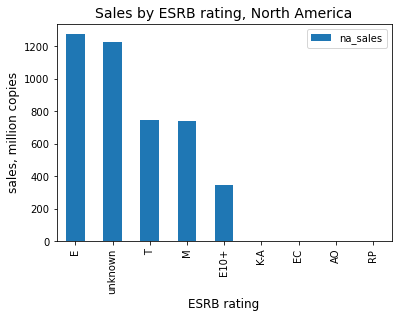

In [101]:
plt.figure(figsize=(9, 7));
ax = rating_na.plot.bar();
plt.title('Sales by ESRB rating, North America',fontsize=14);
plt.xlabel('ESRB rating',fontsize=12);
plt.ylabel('sales, million copies',fontsize=12);

<Figure size 648x504 with 0 Axes>

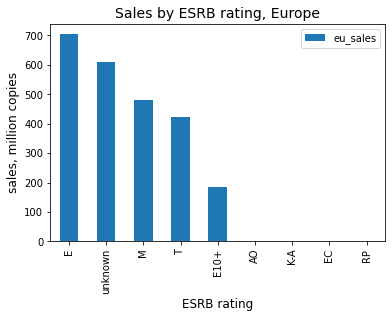

In [102]:
plt.figure(figsize=(9, 7));
ax = rating_eu.plot.bar();
plt.title('Sales by ESRB rating, Europe',fontsize=14);
plt.xlabel('ESRB rating',fontsize=12);
plt.ylabel('sales, million copies',fontsize=12);

<Figure size 648x504 with 0 Axes>

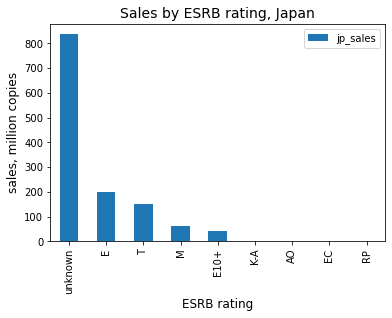

In [103]:
plt.figure(figsize=(9, 7));
ax = rating_jp.plot.bar();
plt.title('Sales by ESRB rating, Japan',fontsize=14);
plt.xlabel('ESRB rating',fontsize=12);
plt.ylabel('sales, million copies',fontsize=12);

Large part of videogames in Japan does not have ESRB rating.

<Figure size 648x504 with 0 Axes>

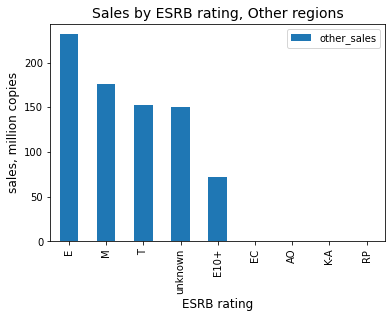

In [104]:
plt.figure(figsize=(9, 7));
ax = rating_other.plot.bar();
plt.title('Sales by ESRB rating, Other regions',fontsize=14);
plt.xlabel('ESRB rating',fontsize=12);
plt.ylabel('sales, million copies',fontsize=12);

The most popular ratings are E, T, M, E10+.

__Summary__

The most popular platforms and genres for each region were determined. Influence of ESRB rating on sales was analysed.

## Hypothesis testing

######  Hypothesis: Means of customers ratings are equal for platforms Xbox One (XOne) and PC. 

***Null Hypothesis:*** _'Means of customers ratings for platforms Xbox One (XOne) and PC are equal'_

***Alternative Hypothesis:*** _'Means of customers ratings for platforms Xbox One (XOne) and PC are not equal'_

Create function for hypothesis testing

In [105]:
def ttest_for_two_populations(population1, population2):
    results = st.ttest_ind(population1, population2)
    print('p-value:', results.pvalue)
    alpha = 0.05
    if results.pvalue < alpha:
        print('reject the null hypothesis')
    else:
        print('fail to reject the null hypothesis')

In [106]:
xone_sorted = data_2016.query('platform == "XOne"') 
xone_user_rating = xone_sorted[['user_score']]

In [107]:
xone_user_rating

,user_score
99,6.4
165,7.9
179,5.4
241,6.4
269,6.2
...,...
16361,8.2
16374,6.6
16376,7.7
16391,6.7


In [108]:
pc_sorted = data_2016.query('platform == "PC"')
pc_user_rating = pc_sorted[['user_score']]

In [109]:
pc_user_rating

,user_score
455,3.9
1516,5.4
1659,6.0
1711,7.9
2274,5.7
...,...
16241,7.9
16250,1.4
16348,7.2
16362,6.8


In [110]:
ttest_for_two_populations(xone_user_rating, pc_user_rating)

p-value: [0.02871075]
reject the null hypothesis


The null hypothesis can be rejected. Alternative hypothesis can be accepted. 

######  Hypothesis: Means of customers ratings are equal for genres Action and Sports.  

***Null Hypothesis:*** _'Means of customers ratings for genres Action and Sports are equal'_

***Alternative Hypothesis:*** _'Means of customers ratings for genres Action and Sports are not equal'_

In [111]:
action_sorted = data_2016.query('genre == "Action"')
action_user_rating = action_sorted[['user_score']]

In [112]:
ports_sorted = data_2016.query('genre == "Sports"')
sports_user_rating = ports_sorted[['user_score']]

In [113]:
ttest_for_two_populations(action_user_rating, sports_user_rating)

p-value: [6.53225997e-49]
reject the null hypothesis


The null hypothesis can be rejected. Alternative hypothesis can be accepted. 

__Summary__

Null hypotheses were rejected.  

## Conclusion

The active sales growth started after 1990. The largest amount of sales took place in 2002-2011. 

Sales amount significantly depends on type of platform. Te most profitable platforms are PS2, X360, PS3, Wii, DS, PS.

The 'lifespan' of a videogame is about 10 years on average. 

Platforms PS4, XOne и 3DS showed the largest amount of sales in 2016.

Mean sales are highest for PS2, PS3, X360, DS, PS.

There is a positive linear correlation between sales amount and critics rating for the most popular products.

Genres with the largest amount of sales are Action и Sports. Genres with the lowest amount of sales are Strategy, Adventure и Puzzle.

The most popular products have ESRB ratings E, T, M, E10+ or no-rating.

From hypothesis testing: means of customers ratings for platforms Xbox One (XOne) and PC are not equal, means of customers ratings for genres Action and Sports are not equal.